# Рабочая тетрадь №7

## студентки БББО-05-20 Гуровой Ольги

## Теоретический материал – Нейронные сети
**Обучение персептрона**

Персептрон представляет собой элементарную часть нейронной сети. Одиночный персептрон является линейным бинарным классификатором. В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, то мы будем рассматривать лишь два класса.  
Пусть мы рассматриваем некоторое множество (конечное или бесконечное) n-мерных векторов, которые будем обозначать x=(x_1,x_2,...,x_n)  
Будем считать, что это множество разбивается на два класса, которые мы будем обозначать +1 и -1. Поэтому возникает задача построения функции, которая задана на нашем множестве векторов, и принимает значения в множестве {+1,-1}. В качестве такой функции может выступать персептрон. С алгебраической точки зрения персептрон состоит из вектора весов w=(w_0,w_1,w_2,...,w_n).  
При этом персептрон работает по формуле  
**y = sign(w_0  + x_1 * w_1  + x_2 * w_2  + ...+ x_n * w_n)**,  
где функция sign(t) равна +1, если t ≥ 0, и равна -1, если t < 0.

Приведем алгоритм обучения персептрона. Пусть у нас есть набор обучающих данных {(x,d)}, где x - это различные вектора, а d из множества {+1,-1} указывает к какому классу относится наш вектор.
1. Положим вектор весов w равным нулю.
2. Повторять N раз следующие шаги:
3. Для каждого тестового набора (x,d):
4. Вычислить y = sing[(x,w)].
5. Если y * d < 0, то скорректировать веса w_0  = w_0  + a * d, w_i  = w_i  + a * dx_i, i = 1,2,...,n.  
Описанный алгоритм довольно легко программировать.

**1.1.1 Пример**

***Задача:***

Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным:


***Решение:***

In [1]:
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
    # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) >  0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    # обучение по всем данным T - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for i in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la, t[0], t[1])
                
# создаем класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаем примеры
T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(la, T) # обучение персептрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

## 1.2. Теоретический материал – Реализация нейронной сети на Python

Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.  
Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подается в качестве входных данных для всех нейронов следующих слоев.  
Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:
- входной слой (получение и передача данных);
- скрытый слой (вычисление);
- выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:
- x → x * w_1;
- y → y * w_2.

Входы после взвешивания суммируются с прибавлением значения порога «c»:  
**x * w_1  + y * w_2  + c**

Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:  
**z = f(x * w_1  + y * w_2  + c)**

Так выглядит сигмоида:
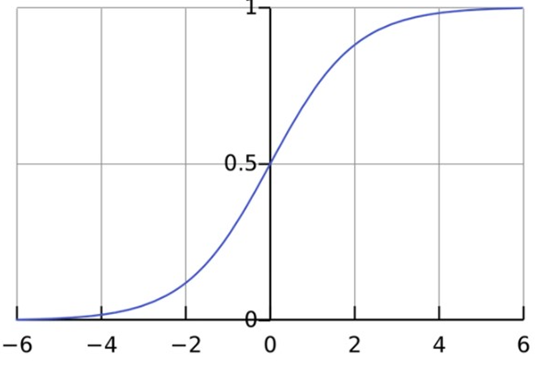
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.

Например. Пусть нейрон имеет следующие значения: w = [0, 1] c = 4.
Входной слой: x = 2, y = 3.

((x * w_1) + (y * w_2)) + c = 2 * 0 + 3 * 1 + 4 = 7.  
z = f(7) = 0.99.

**1.1.2 Пример**

Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

***Решение:***

In [2]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # c = 4
n = Neuron(weights, bias)
x = np.array([2, 3])       # x = 2,  y = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. Пример несложной нейронной сети
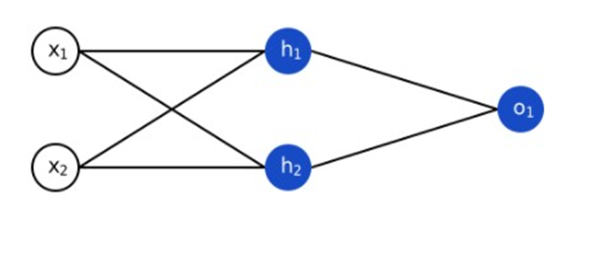
где:  
x_1,x_2 — входной слой;  
h_1,h_2 — скрытый слой с двумя нейронами;  
o_1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса [0,1]. Пороговое значение (b) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.  
При входных данных x=[2,3] получим:  
h_1  = h_2  = f(w * x + b) = f((0 * 2) + (1 * 3) + 0) = f(3) = 0.95.  
o_1  = f(w * [h_1, h_2] + b) = f((0 * h_1) + (1 * h_2) + 0) = f(0.95) = 0.72.  
Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [3]:
import numpy as np 
class OurNeuralNetwork:
    '''
    Данные нейросети:
        - два входа 
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Вход для о1 - это выходы h1, h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


## Теоретический материал – Обучение нейронной сети
Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.  
Класс нейронной сети:

In [4]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

Каждый этап процесса обучения состоит из:
- прямого распространения (прогнозируемый выход);
- обратного распространения (обновление весов и смещений).

Например:  
Дана двуслойная нейросеть:

ŷ = σ * (w_2 * σ * (w_1 * x + b_1)+ b_2).

В данном случае на выход ŷ влияют только две переменные — w (веса) и b (смещение). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:
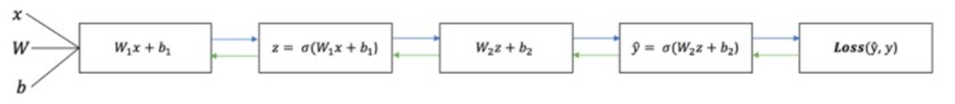

**Прямое распространение.**  
Как видно, формула прямого распространения представляет собой несложное вычисление:

ŷ = σ * (w_2 * σ * (w_1 * x + b_1) + b_2)

Далее необходимо добавить в код функцию прямого распространения.  
Предположим, что смещения в этом случае будут равны 0.

In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer, self.weights2)) 

Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами:
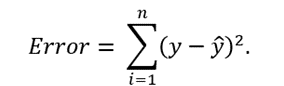

**Обратное распространение**  
Обратное распространение позволяет измерить производные в обратном порядке — от конца к началу, и скорректировать веса и смещения. Для этого необходимо узнать производную функции потери — тангенс угла наклона.
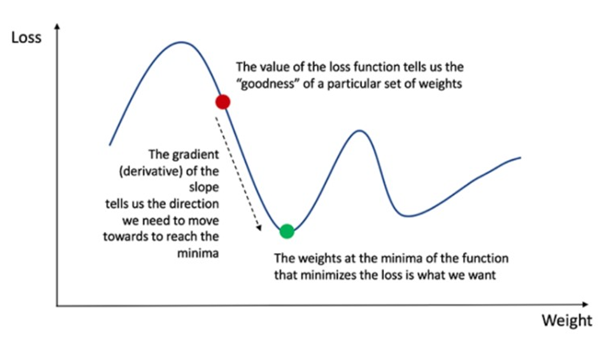
Производная функции по отношению к весам и смещениям позволяет узнать градиентный спуск. Производная функции потери не содержит весов и смещений, для ее вычисления необходимо добавить правило цепи:
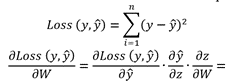
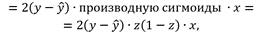
где z = W * x + b.  
Благодаря этому правилу можно регулировать веса. Добавляем в код Python функцию обратного распространения:

In [6]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer, self.weights2))  
        
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output),
                                                 self.weights2.T) * sigmoid_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2        

Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.

**Задание**

***Задача:***

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.  

Данные нейросети:
- три входа (x_1, x_2, x_3 );
- три нейрона в скрытых слоях (h_1, h_2, h_3);
- выход (o_1).  
Нейроны имеют идентичные веса и пороги:
- w = [0.5, 0.5, 0.5] 
- b = 0   

Данные нейросети:
- два входа (x_1,x_2);
- два нейрона в скрытых слоях (h_1,h_2);
- два выхода (o_1,o_2 ).  
Нейроны имеют идентичные веса и пороги:
- w = [1, 0];
- b = 1.


***Решение:***

In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
     
network = OurNeuralNetwork()
x = np.array([1, 2, 3])
print(network.feedforward(x))

0.8067238139969796


In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2 
     
network = OurNeuralNetwork()
x = np.array([1, 2])
print(network.feedforward(x))

(0.8677026536525567, 0.8677026536525567)


**Задание**

***Задача:***

Реализуйте классы нейронных сетей с использованием других функций активации.
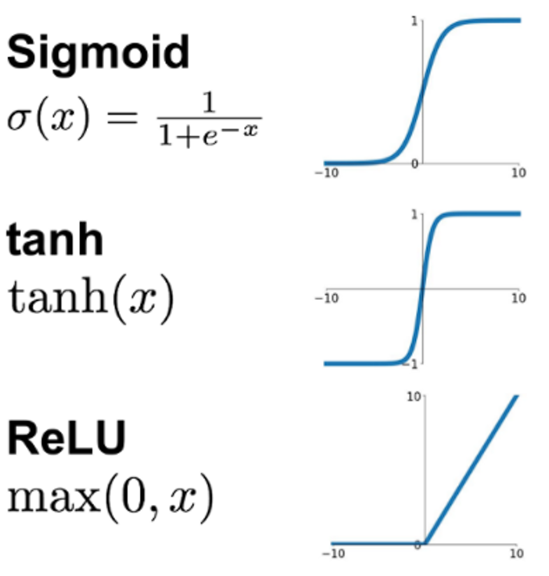

***Решение:***

In [9]:
import numpy as np

def sigmoid(x):
    # функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)    
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # выводы для о1 - это выводы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 

0.7216325609518421


In [10]:
import numpy as np

def tanh(x):
    return np.tanh(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)    
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # выводы для о1 - это выводы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 

0.7595094447988621


In [11]:
import numpy as np

def tanh(x):
    return max(0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)    
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # выводы для о1 - это выводы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 

3


## 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python ##
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо выполнить, чтобы построить простую нейронную сеть с плотными связями. В этом разделе мы попытаемся построить простую нейронную сеть, которая предсказывает класс, к которому принадлежит данное растение ириса. Мы будем использовать библиотеку Python Scikit-Learn для создания нашей нейронной сети.  
Sklearn предоставляет 2 оценщика для задач классификации и регрессии соответственно:
- MLPClassifier;
- MLPRegressor  
Начнем с импорта необходимых библиотек.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## MLPClassifier ##
**Загрузка данных**

Мы будем загружать два набора данных.  
Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.  
Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.
Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().

In [13]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y__digits = digits.data, digits.target
print('Dataset Size: ', X_digits.shape, Y__digits.shape) 

Dataset Size:  (1797, 64) (1797,)


In [31]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


**Классификация**

MLPClassifier — это класс, доступный как часть модуля *neuro_network sklearn* для выполнения задач классификации с использованием многослойного персептрона.  
Как обычно разделим набор данных на две части:
- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.
Функция **train_test_split** модуля *model_selection sklearn* поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования. Мы также используем **seed(random_state=123)** с train_test_split, *чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизволить результаты в будущем*

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X_digits, Y__digits, 
                train_size = 0.80, test_size = 0.20, stratify = Y__digits, random_state = 123)
print('Thain/Test Size: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Thain/Test Size:  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию для тренировочных данных.

In [25]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state = 123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [26]:
Y_pred = mlp_classifier.predict(X_test)

print(Y_pred[:15])
print(Y_test[:15])
# Метод Score для оценки точности моделей классификации
print('Test Accuracy : %.3f' %mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f' %mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

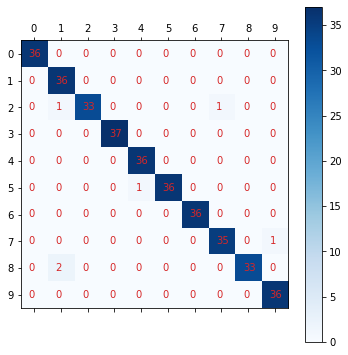

In [27]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color = 'tab:red')
            
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, которые могут предоставить значимую информацию после обучения модели.
- **loss_** — возвращает убыток после завершения процесса обучения.
- **coefs_** — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.
- **intercepts_** — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.
- **n_iter_** — количество итераций, для которых выполнялась оценка.
- **out_activation_** — возвращает имя функции активации выходного слоя.

In [28]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Numbers of Intercepts : ", len(mlp_classifier.intercepts_))
print("Numbers of Intercepts for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Outout Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.003472868499418062
Number of Coefs:  2
Numbers of Intercepts :  2
Numbers of Intercepts for Which Estimator Ran :  125
Name of Outout Layer Activation Function :  softmax


## MLPRegressor ##
MLPRegressor — это класс, доступный как часть библиотеки *neuro_network sklearn* для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:
- данные обучения (80%), которые будут использоваться для модели обучения;
- тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)

print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Size :  (404, 13) (102, 13) (404,) (102,)


In [33]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [34]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
#Метод Score оценивает точность моделей классификаций
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:

In [35]:
print("Loss : ", mlp_regressor.loss_)

Loss :  28.538174061119594


In [36]:
print("Number of Coefs : ", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [37]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  130


In [38]:
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Name of Output Layer Activation Function :  identity


**1.2.1 Задание**

***Задача:***

Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv  
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv 



***Решение:***

Dataset Sizes:  (150, 4) (150,)
Train/test sizes:  (120, 4) (30, 4) (120,) (30,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Virginica']
80     Versicolor
45         Setosa
144     Virginica
110     Virginica
38         Setosa
2          Setosa
135     Virginica
72     Versicolor
138     Virginica
34         Setosa
19         Setosa
77     Versicolor
101     Virginica
63     Versicolor
117     Virginica
Name: variety, dtype: object
Test Accuracy : 0.933
Training Accuracy : 0.983
Loss :  0.29887893401974336
Number of Coefs :  2
Number of Intercepts :  2
Number of iterations for which estimator Ran:  200
Name of Output Layer Activation Function:  softmax


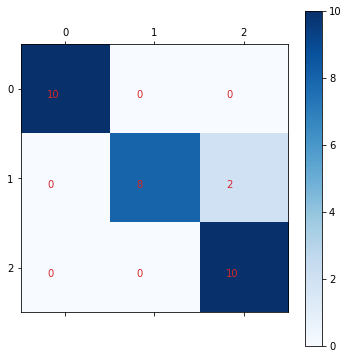

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

dataset = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
X_dataset = dataset.iloc[:, :-1]
Y_dataset = dataset.iloc[:, -1]
print('Dataset Sizes: ', X_dataset.shape, Y_dataset.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, 
                 train_size = 0.80, test_size = 0.20, stratify = Y_dataset,
                 random_state = 123)
print('Train/test sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state = 123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

# Метод Score для оценки точности моделей классификации
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

from sklearn.metrics import confusion_matrix
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator Ran: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j,i]), color='tab:red')
            
plot_confusion_matrix(Y_test,  mlp_classifier.predict(X_test))

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
X_dataset = dataset.iloc[:, :-1]
Y_dataset = dataset.iloc[:, -1]
print('Dataset Sizes: ', X_dataset.shape, Y_dataset.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, 
                 train_size = 0.80, test_size = 0.20, random_state = 123)
print('Train/test sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state = 123)
mlp_regressor.fit(X_train, Y_train)
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# Метод Score оценивает точность моделей классификации.
print('Test R^2 Score : %3.f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score : %3.f'%mlp_regressor.score(X_train, Y_train))
print("Loss : ", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)


Dataset Sizes:  (30, 1) (30,)
Train/test sizes:  (24, 1) (6, 1) (24,) (6,)
[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
7      54445.0
29    121872.0
5      56642.0
26    116969.0
8      64445.0
27    112635.0
Name: Salary, dtype: float64
Test R^2 Score :  -9
Training R^2 Score :  -8
Loss :  2988058032.1601596
Number of Coefs :  2
Number of Iterations for Which Estimator Ran:  200
Name of Output Layer Activation Function :  identity


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
